<a href="https://colab.research.google.com/github/py242016019/CEE2/blob/main/22_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

- Clustering (ou Agrupamento) tem por objetivo identificar padrões naturais nos dados, formando subconjuntos (chamados de clusters) em que os elementos de um mesmo grupo sejam mais parecidos entre si do que com os de outros grupos.

- Geralmente é tratado como técnicas de *Aprendizado de Máquina Não Supervisionado* usada para agrupar dados com base em características semelhantes.

  - Diferente dos métodos supervisionados, esses métodos não requer rótulos ou categorias pré-definidas, tornando-se uma ferramenta para explorar e possívelmente descobrir estruturas ocultas em conjuntos de dados.

- Útil em diversas áreas, como análise de mercado, segmentação de clientes, reconhecimento de padrões e biologia.


> **A saber:** existem abordagens supervisionadas que se assemelham a Clustering, como em *Classificação*, no qual os rótulos são conhecidos, e o objetivo é prever a qual grupo (classe) uma nova amostra pertence. Exemplo: árvores de decisão, SVM.

Neste notebook, vamos explorar três métodos:
- K-Means;
- Agrupamento Hierárquico;
- DBSCAN.

> Todos são algoritmos de *Aprendizado Não Supervisionado*.

> Vamos usar conjuntos de dados simples e visuais para facilitar a compreensão.

A seguir, vamos carregar as bibliotecas que utilizaremos neste tutorial. Além das bibliotecas que já estudamos, também usaremos:

- `sklearn`: para construir e ajustar os modelos de agrupamento;
- `scipy`: para visualização de estruturas hierárquicas (dendrogramas).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

---
## Gerando dados artificiais
Vamos usar `make_blobs` para gerar pontos agrupados em regiões distintas.

> Em especial, vamos usar:
> - `make_blobs(n_samples=30, centers=4, cluster_std=0.6, random_state=0)`

> Explicação:
- `n_samples=30`: define o número total de pontos que serão gerados;
- `centers=4`: especifica o número de agrupamentos (clusters) que o conjunto de dados terá;
- `cluster_std=0.6`: determina a dispersão (desvio padrão) dos pontos em torno dos centros de cada cluster. Valores maiores criam clusters mais espalhados;
- `random_state=0`: define uma semente para o gerador de números aleatórios, garantindo que os mesmos dados sejam gerados em diferentes execuções (reprodutibilidade).

> Retorno:
> - A função retorna duas variáveis: `X, y = make_blobs(...)`;
- `X`: um array numpy com duas coordenadas dos pontos gerados (`[feature_1, feature_2]`).
- `y`: os rótulos verdadeiros dos clusters aos quais cada ponto pertence (útil apenas para avaliação, pois não é usado nos modelos de clustering não supervisionados).

X[:5,] = 
 [[-1.62884903  7.61781532]
 [ 1.4949318   3.85848832]
 [-1.20834544  8.01694315]
 [-2.27858123  3.38437647]
 [-1.83269532  2.65503768]] 




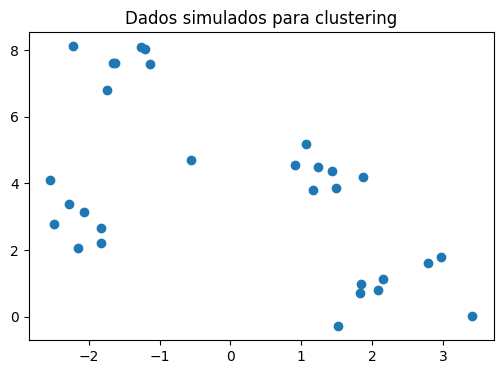

In [3]:
X, y_true = make_blobs(n_samples=30, centers=4, cluster_std=0.6, random_state=0)

print("X[:5,] = \n", X[:5,], "\n\n")

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Dados simulados para clustering")
plt.show()

---
## Método K-Means

O K-Means é um algoritmo de clustering que divide um conjunto de dados em $K$ grupos (clusters) distintos, baseando-se na proximidade entre os pontos. Seu objetivo é minimizar a distância total entre os pontos e o centro (centróide) de seus respectivos clusters.


### Algoritmo
O funcionamento básico do algoritmo segue os passos abaixo:

1. **Escolha do número de clusters $(K)$:**
O usuário define previamente quantos agrupamentos deseja identificar.

1. **Inicialização dos centróides:**
O algoritmo escolhe aleatoriamente $K$ pontos do conjunto de dados como os centróides iniciais (centros dos clusters).

1. **Atribuição dos pontos aos clusters:**
Cada ponto do conjunto de dados é atribuído ao centróide mais próximo, formando $K$ grupos.

1. **Recalculando os centróides:**
Para cada grupo, o algoritmo calcula a nova posição do centróide como a média de todos os pontos atribuídos a ele.

1. **Repetição:**
Os passos 3 e 4 são repetidos até que os centróides não mudem mais (ou mudem muito pouco), indicando que o algoritmo convergiu.

### Ilustração

A figura mostra apenas as 3 primeiras iterações do algoritmo K-Means, ilustrando:

1. A atribuição inicial dos pontos com base nos centróides escolhidos aleatoriamente.

1. A atualização dos centróides para o centro dos pontos atribuídos.

1. A nova atribuição dos pontos com base na posição atualizada dos centróides.


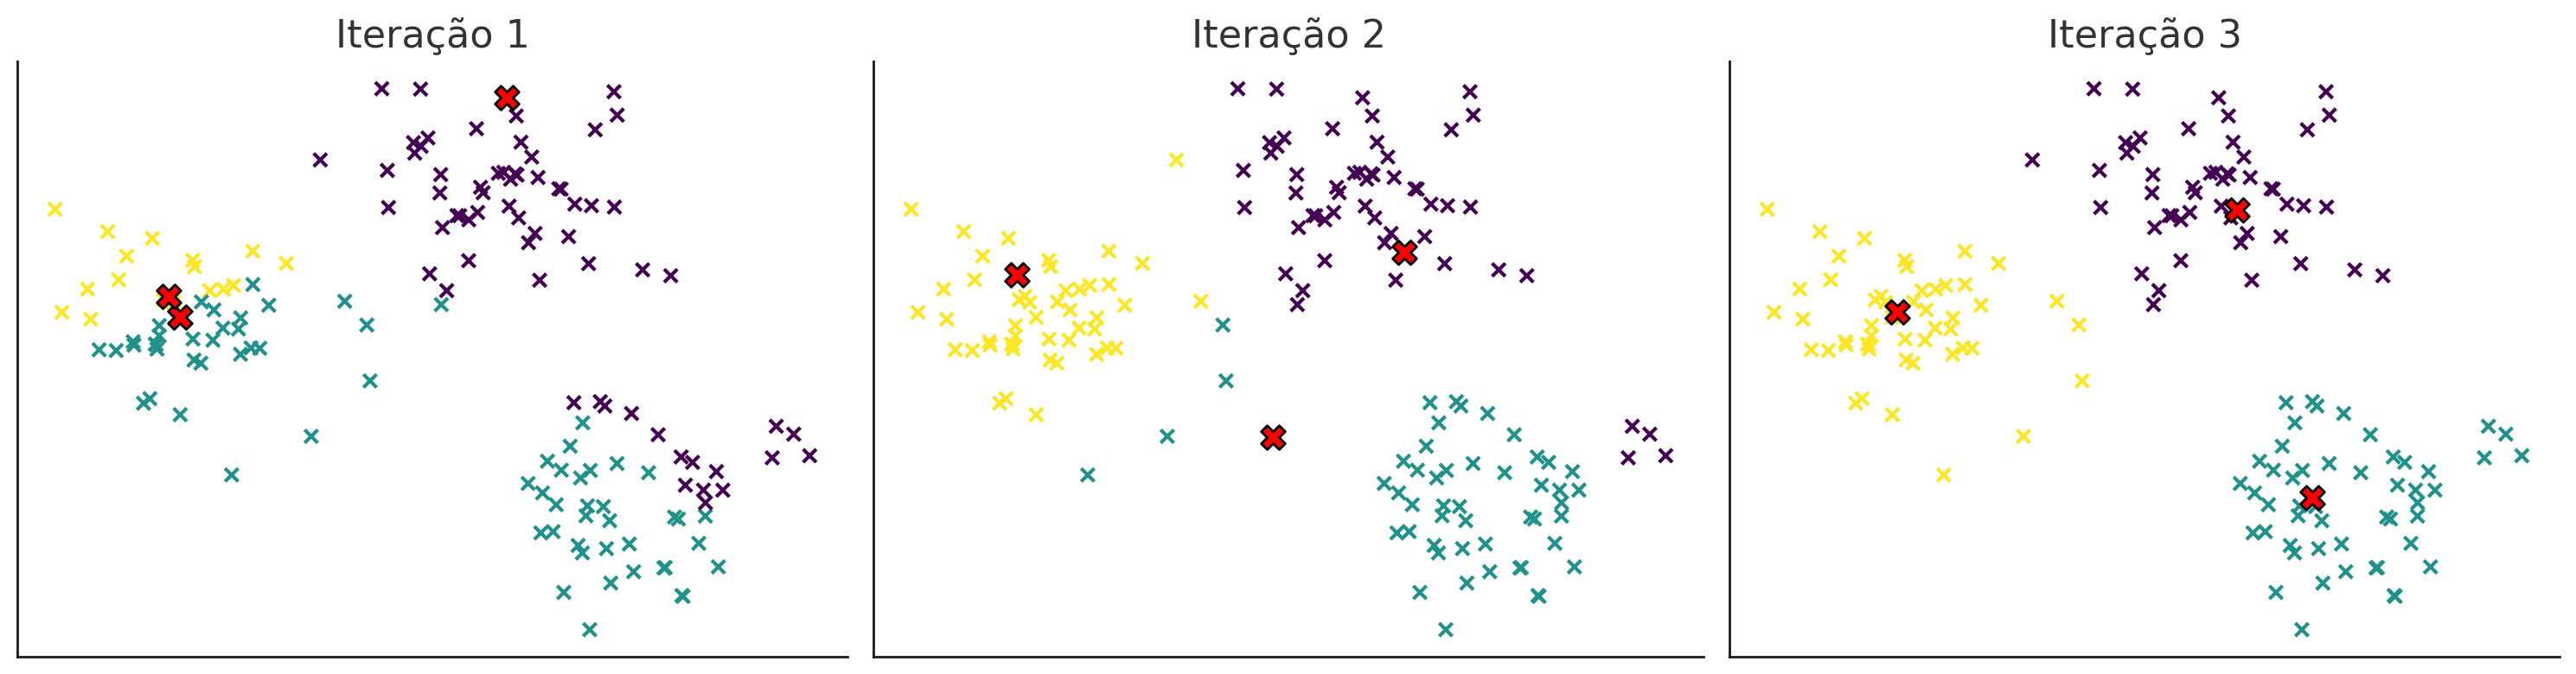

<br><br>

---
### Distância Euclidiana

A atribuição dos pontos aos clusters no algoritmo K-Means geralmente é feita com base na **distância euclidiana** entre cada ponto e os centróides.

- Seja um ponto $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ e um centróide $\mathbf{c} = (c_1, c_2, \ldots, c_n)$, a distância euclidiana entre eles é definida por:
$$
d(\mathbf{x}, \mathbf{c}) = \sqrt{(x_1 - c_1)^2 + (x_2 - c_2)^2 + \cdots + (x_n - c_n)^2}
$$
> Durante cada iteração do algoritmo, cada ponto $\mathbf{x}$ é atribuído ao cluster cujo centróide $\mathbf{c}$ minimiza essa distância.

<br><br>


### Quando a distância euclidiana pode não funcionar bem?

1. Dados com diferentes escalas:
> Se as variáveis do seu conjunto de dados têm escalas muito diferentes (por exemplo, altura em metros e renda em milhares), a distância euclidiana pode ser dominada por variáveis com maior escala, distorcendo os agrupamentos.
  - *Como resolver: padronizar ou normalizar os dados antes de aplicar KMeans.*

1. Dados com muitas dimensões (mal da dimensionalidade):
> Em espaços de alta dimensão, a distância euclidiana perde discriminatividade: todas as distâncias tendem a ficar semelhantes, dificultando o agrupamento significativo.
 - *Como resolver: reduzir a dimensionalidade (PCA, t-SNE) ou usar métricas específicas.*

1. Dados categóricos ou mistos:
> A distância euclidiana é definida para variáveis numéricas contínuas. Para dados categóricos (ex.: gênero, cor), essa métrica não faz sentido.
 - *Como resolver: usar métricas como Hamming (apenas para binárias, mede a proporção de valores diferentes), ou algoritmos que suportem dados mistos, como K-Prototypes (semelhando ao K-Means, mas com métrica mista Euclidiana+Hamming).*

1. Presença de outliers:
> Pontos fora do padrão podem influenciar fortemente os centróides e, consequentemente, o agrupamento com distância euclidiana.
 - *Como resolver: usar métodos robustos, como K-Medians ou DBSCAN.*

 <br><br>




---
### Exemplo

A célula abaixo executa ajusta o método K-Means ao conjunto de dados simulado.

- `KMeans(n_clusters=4, random_state=0)`: Aqui estamos instanciando o método de agrupamento KMeans.

  - `n_clusters=4`: define o número de grupos (clusters) que queremos encontrar nos dados. Neste caso, 4.

  - `random_state=0`: garante que os resultados sejam reproduzíveis, fixando a aleatoriedade na escolha inicial dos centróides.

- `kmeans.fit(X)`: Este comando ajusta (treina) o método KMeans aos dados `X`.

- `kmeans.predict(X)`: Após o método ter sido ajustado, este comando atribui cada ponto do conjunto `X` ao seu cluster correspondente.

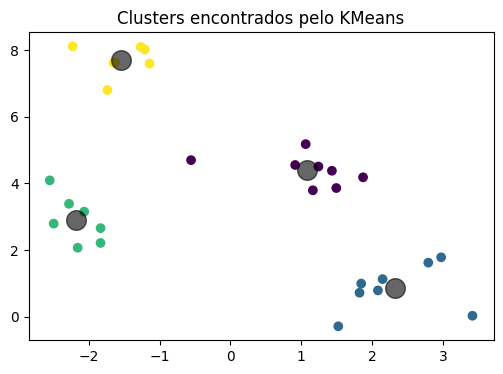

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)
plt.title("Clusters encontrados pelo KMeans")
plt.show()

<br> <br>


---
## Método Agrupamento Hierárquico

O agrupamento hierárquico é um método de clustering que constrói uma hierarquia de agrupamentos, sem precisar que você defina previamente o número de clusters. Ele é particularmente útil quando:

- Não sabemos quantos clusters existem nos dados;

- Queremos entender a estrutura de similaridade entre os dados;

- Precisamos de uma visualização da organização dos dados, como o dendrograma.


### Abordagens
Existem duas abordagens principais:

1. Aglomerativo (*bottom-up*) — o mais comum
  - Começa com cada ponto como seu próprio cluster;

  - Iterativamente, junta os dois clusters mais próximos;

  - Repete até que todos os pontos formem um único cluster.

2. Divisivo (*top-down*)
  - Começa com todos os pontos em um só cluster;

  - Vai dividindo recursivamente os clusters;

  - Pouco usado na prática, pois é computacionalmente mais custoso.

> Neste tutorial, vamos estudar o método *bottom-up*.

### Visualização: Dendrograma

Um dendrograma é uma árvore que mostra como os clusters foram sendo fundidos de acordo com a distância.

- Cortar essa árvore em um certo nível define o número de grupos que queremos.

> **Figura abaixo:** o dendrograma apresentado representa a sequência de fusões entre cinco pontos rotulados como A, B, C, D e E.

> No qual, podemos observar:

> 1. A e B são os dois pontos mais próximos no espaço. Por isso, são agrupados primeiro, com uma distância pequena.

> 2. Em seguida, D e E são fundidos, pois também estão próximos.

> 3. O ponto C é mais distante, mas acaba sendo agrupado ao par {D, E} na terceira fusão.

> 4. Por fim, os dois grandes grupos resultantes, {A, B} e {C, D, E}, são unidos na última etapa da hierarquia.


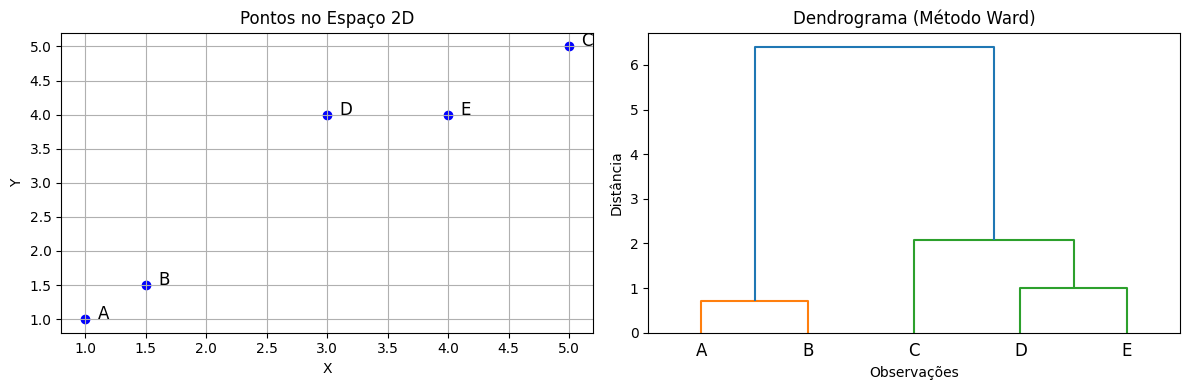

> Como interpretar cortes?

>> A cada linha horizontal no dendrograma corresponde uma fusão entre grupos. A altura dessa linha indica o "custo" da fusão, ou seja, o aumento da variância total intra-cluster segundo o critério de Ward.

>> Se realizarmos um corte horizontal logo abaixo da última fusão, obteremos dois grupos principais:

>> Grupo 1: A, B

>> Grupo 2: C, D, E

---
### Algoritmo Aglomerativo (*Bottom-Up*)

O algoritmo hierárquico aglomerativo constrói uma árvore de agrupamentos (dendrograma) fundindo iterativamente os pares de clusters mais próximos, até que todos os pontos estejam em um único grupo.

#### Passos do algoritmo:

1. **Inicialização**:
   - Cada observação é considerada um cluster individual (no total, N clusters para N pontos).

2. **Cálculo das distâncias**:
   - Calcula-se uma matriz de distâncias entre todos os pares de clusters.
   - A métrica de distância pode ser (considere $(x,y)$ um par de pontos $n$-dimensional):
     - Euclidiana: $$d_{euc}(x, y) = \sqrt{ \sum_i^n (x_i - y_i)^2 }$$
     - Manhattan: $$d_{man}(x, y) = \sum_i^n |x_i - y_i|$$
     - Correlação:
$$d_{cor}(x,y) = 1 - corr(x,y)$$
     - entre outras.


3. **Critérios de ligação (*linkage*)**:
   - Encontra-se o par de clusters com a **menor distância** segundo o critério escolhido:
     - **Single linkage**: menor distância entre pontos dos dois clusters.
     - **Complete linkage**: maior distância entre pontos.
     - **Average linkage**: média das distâncias.
     - **Ward**: aumento mínimo da variância total intra-cluster. Limitado a distância euclidiana, será detalhado abaixo.
   - Os dois clusters mais próximos são fundidos.

4. **Atualização da matriz de distâncias**:
   - Recalcula-se as distâncias entre o novo cluster e os demais.

5. **Iteração**:
   - Repete-se os passos 3 e 4 até que reste apenas **um único cluster** contendo todos os dados.

#### Resultado final:
- A estrutura de fusões pode ser representada como um **dendrograma**.
- Para obter agrupamentos finais, escolhe-se um número de clusters **cortando o dendrograma** em um determinado nível de altura.

> O agrupamento hierárquico não exige que se especifique o número de clusters antecipadamente e fornece uma representação visual clara das relações entre os dados.


---
### Detalhamento *Ward linkage*

> O método de Ward realiza fusões entre clusters buscando **minimizar o aumento da soma dos quadrados das distâncias intra-cluster**. A função de custo associada pode ser expressa como:
$$
\Delta E = \frac{1}{\#C}\sum_{x \in C} \|x - \mu_C\|^2
$$
em que:
> - $C$ é o novo cluster formado pela fusão de dois grupos.
> - $\mu_C$ é o centróide (média) dos pontos em $C$.
> - $\|x - \mu_C\|^2$ é a distância euclidiana ao quadrado entre o ponto $x$ e o centróide $\mu_C$.
> - $\#C$ denota a cardinalidade do conjunto $C$.

> O algoritmo escolhe, a cada passo, a fusão que resulta no **menor aumento de $\Delta E$**.

>> **Observação**: o método de Ward **assume o uso da distância euclidiana ao quadrado**, e por isso não é compatível com outras métricas de distância.



---
### Exemplo

A célula abaixo executa o método de Agrupamento Hierárquico ao conjunto de dados simulado.

- `linkage(X, method='ward', metric='euclidean', optimal_ordering=False)`: Aqui estamos excutando o método.

  - `method='ward'`: define o método de *linkage*. Neste caso, *Ward*.

  - `metric='euclidean'`: define a métrica de distância entre os pontos.

  - `optimal_ordering=False`: Se `True`, reordena os filhos dos nós da árvore para tentar produzir um dendrograma mais claro (melhora a visualização, mas Não afeta o resultado).

- `dendrogram(linked)`: Gera o gráfico do dendrograma para o agrupamento `linked`.  

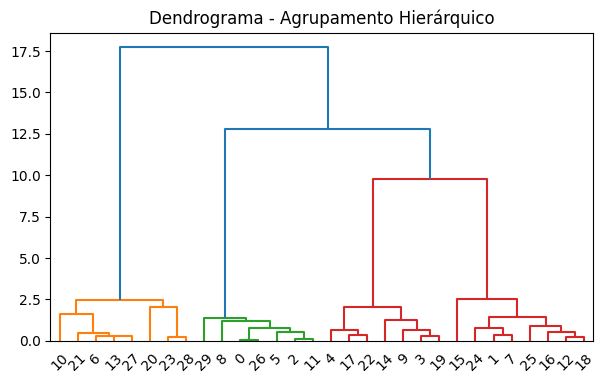

In [ ]:
linked = linkage(X, method='ward', metric='euclidean', optimal_ordering=False)

plt.figure(figsize=(7, 4))
dendrogram(linked)
plt.title("Dendrograma - Agrupamento Hierárquico")
plt.show()

Tendo analisado o dendrograma, suponha que entendemos que devemos formar 4 clusters.
<br> <br>

O processo de corte pode ser feito de duas maneiras utilizando a função `fcluster()`:

- `fcluster(linked, t=4, criterion='maxclust')`.

  - `t=4`: define o corte de acordo com o argumento `criterion`. Neste caso, *4*.

  - `criterion='maxclust'`: Forma no máximo $t$ clusters (ideal para dizer quantos grupos você quer).


- `fcluster(linked, t=7.5, criterion='distance')`.

  - `t=7.5`: define o corte de acordo com o argumento `criterion`. Neste caso, *7.5*.

  - `criterion='distance'`: Corta a árvore em uma altura fixa `t` no dendrograma.  

<br> <br>
> Nas células abaixo apresentamos as duas implementações, as quais são equivalentes.


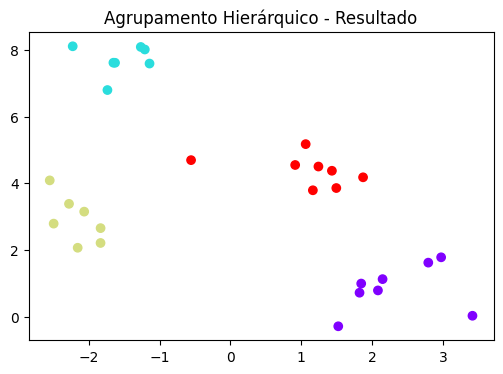

In [ ]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(linked, t=4, criterion='maxclust')

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title("Agrupamento Hierárquico - Resultado")
plt.show()

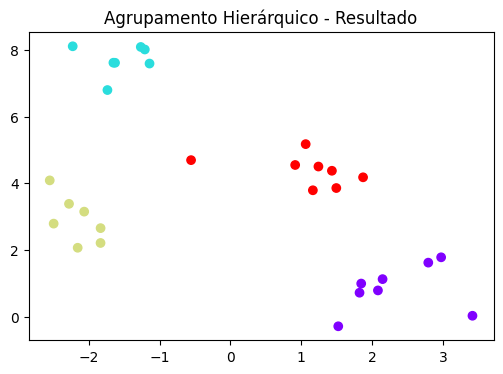

In [ ]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(linked, t=7.5, criterion='distance')

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title("Agrupamento Hierárquico - Resultado")
plt.show()

---
## Método DBSCAN

O DBSCAN (*Density-Based Spatial Clustering of Applications with Noise*) é um algoritmo de clustering baseado em densidade que agrupa pontos próximos e identifica outliers como ruído. Ele é especialmente útil para dados com formas arbitrárias e para detectar clusters em meio a pontos dispersos.

> Diferente do K-Means, que assume clusters esféricos e exige que o número de grupos ($k$) seja informado, o DBSCAN identifica automaticamente quantos agrupamentos existem e quais pontos não pertencem a nenhum deles.

Esse método é especialmente útil quando:

- Os clusters têm **formas irregulares** (não esféricas);
- Existe **ruído nos dados / outliers** (pontos isolados);
- O número de clusters **não é conhecido previamente**.

---
### Conceitos Fundamentais do DBSCAN

O algoritmo utiliza dois parâmetros principais:

- $\varepsilon$ (**eps**): Raio de vizinhança ao redor de um ponto.

- **min_samples**: Número mínimo de pontos dentro do raio ε para considerar um ponto como "core point".

Os pontos são classificados em três categorias:

- **Core Point (Ponto Central)**:

  - Um ponto que tem pelo menos **min_samples** pontos dentro de seu raio $\varepsilon$ (incluindo ele mesmo).

  - Esses pontos formam o núcleo dos clusters.

- **Border Point (Ponto de Borda)**:

  - Um ponto que tem menos de **min_samples** dentro de $\varepsilon$, mas está na vizinhança de um Core.

  - Pertence a um cluster, mas não é denso o suficiente para ser um núcleo.

- **Noise Point (Ruído)**:

  - Um ponto que não é core nem border.

  - Não pertence a nenhum cluster e é considerado outlier.

---
### Algoritmo

O DBSCAN funciona da seguinte maneira:

**Passo 1: Selecionar um ponto não visitado aleatoriamente**

- Se o ponto já foi visitado, o algoritmo ignora e passa para o próximo.

- Caso contrário, marca-o como visitado.

**Passo 2: Verificar se é um Core Point**

- Conta quantos pontos estão dentro do raio $\varepsilon$.

  - Se **≥ min_samples**: o ponto é um **Core**, e um novo cluster é iniciado.

  - Se **< min_samples**: o ponto é temporariamente marcado como ruído (pode ser reclassificado depois como **Border Point**).

**Passo 3: Expandir o Cluster (Busca em Profundidade)**

- Se o ponto é **Core**, todos os pontos dentro de $\varepsilon$ são adicionados ao cluster.

- Cada novo ponto é verificado:

  - Se for **Core**, sua vizinhança também é explorada (expansão recursiva).

  - Se for **Border**, é adicionado ao cluster, mas não expande.

**Passo 4: Repetir até que todos os pontos sejam visitados**

- O algoritmo continua até que não haja mais pontos não visitados.

- Pontos que não foram alcançados por nenhum **Core Point** são classificados como ruído.


---
### Ilustração

A sequência de figuras abaixo ilustra o funcionamento do algoritmo DBSCAN.

  > Observe que o conjunto de dados possui claramente dois clusters com formato não esférico (em formato de meia-lua) e também apresenta alguns pontos atípicos (ruído).

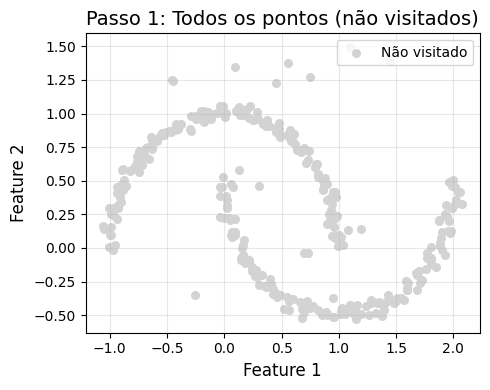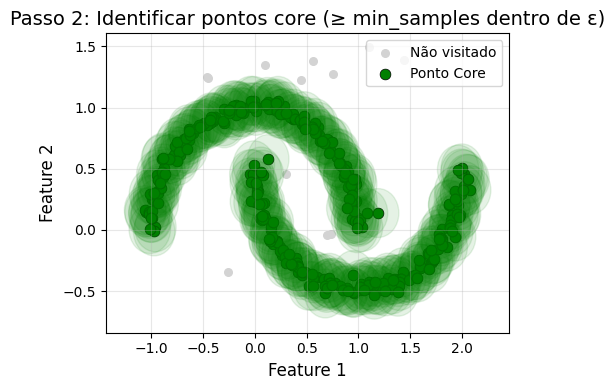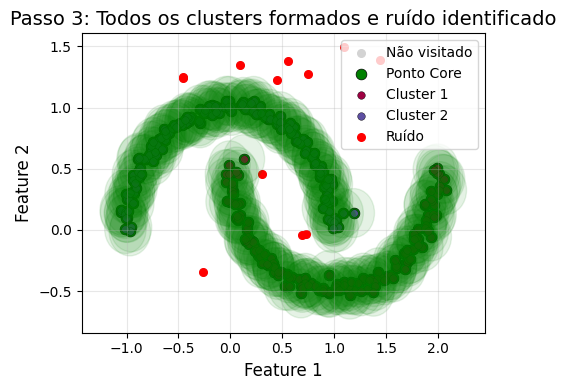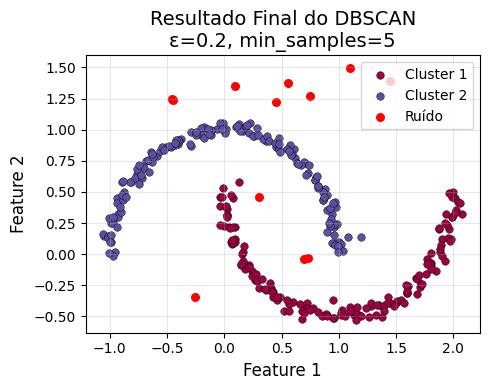

---
### Vantagens

- Descobre **número de clusters automaticamente**;
- Resistente a **outliers**;
- Detecta **clusters de formas arbitrárias**.

### Limitações

- Sensível à escolha de `eps` e `min_samples`;
- Difícil de ajustar os parâmetros em dados de **densidade variável**.

---
### Exemplo


A célula abaixo executa ajusta o método DBSCAN ao conjunto de dados simulado.

- `DBSCAN(eps=eps, min_samples=min_samples)`: Aqui estamos instanciando o método de agrupamento DBSCAN.

  - `eps=0.9`: parametro $\varepsilon$. Neste caso, 0.9.

  - `min_samples=3`: parâmetro `min_sample`. Neste caso, 3.

- `dbscan.fit_predict(X)`: Este comando ajusta (treina) o método DBSCAN aos dados `X`. Após o método ter sido ajustado, este comando atribui cada ponto do conjunto `X` ao seu cluster correspondente.

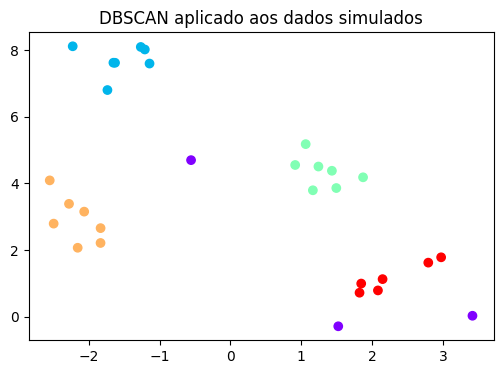

In [ ]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=3)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title("DBSCAN aplicado aos dados simulados")
plt.show()

A célula abaixo gera o gráfico conhecido como gráfico k-dist, o qual mostra a distância ao 3º vizinho mais próximo (`min_samples = 3`) para cada ponto. Ele é utilizado como ferramenta auxiliar na escolha do valor ideal de `eps` no algoritmo DBSCAN.

- Fixando o valor de `min_samples`, podemos explorar diferentes valores de `eps` para tomar uma decisão mais fundamentada. Uma forma prática de fazer isso é plotar, em ordem crescente, a distância ao vizinho mais próximo de cada ponto. Nesse gráfico, o objetivo é identificar o ponto onde a curvatura se acentua de maneira mais evidente, o que chamamos de "joelho" da curva.

- A linha vermelha representa o valor de `eps = 0.9` utilizado anteriormente. O ponto onde ocorre a maior curvatura na curva costuma ser uma boa indicação de valor para eps, pois marca a transição entre regiões densas e áreas mais esparsas no conjunto de dados.

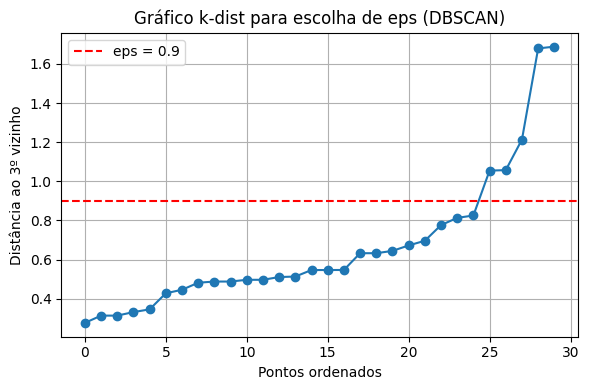

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Definir min_samples
min_samples = 3

# Ajustar vizinhos mais próximos
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, _ = neighbors_fit.kneighbors(X)

# Ordenar as distâncias ao k-ésimo vizinho
k_distances = np.sort(distances[:, -1])

# Plotar o gráfico k-dist
plt.figure(figsize=(6, 4))
plt.plot(k_distances, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='eps = 0.9')  # Linha vermelha
plt.xlabel("Pontos ordenados")
plt.ylabel(f"Distância ao {min_samples}º vizinho")
plt.title("Gráfico k-dist para escolha de eps (DBSCAN)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---
## Exercício 1

Para o conjunto de dados Iris, aplique os três algoritmos de agrupamento vistos em aula: K-Means, Agrupamento Hierárquico e DBSCAN.

Seu objetivo é:

- Ajustar os algoritmos de clustering.

- Visualizar os agrupamentos obtidos em um gráfico 2D com redução de dimensionalidade (PCA).

> O código abaixo carrega o conjunto de dados Iris, aplica o PCA para reduzir a dimensionalidade para duas componentes principais e exibe, em um gráfico 2D, a classificação verdadeira das amostras com base nas espécies originais.

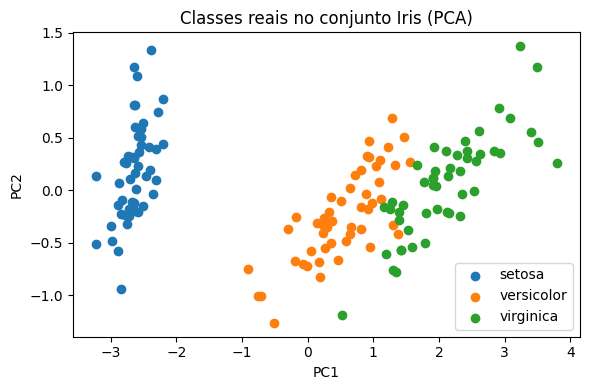

In [10]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Reduzir a dimensionalidade para 2D com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualização das classes reais (para referência)
plt.figure(figsize=(6, 4))
for i, name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=name)
plt.title("Classes reais no conjunto Iris (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


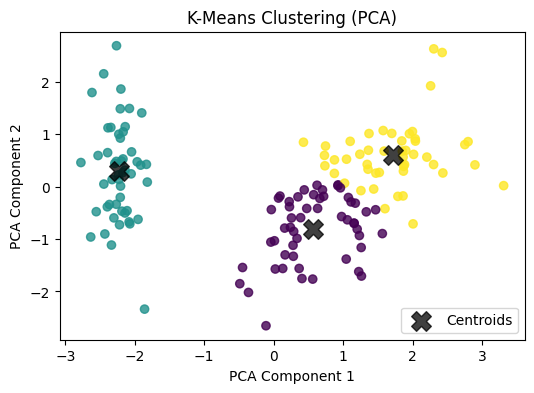

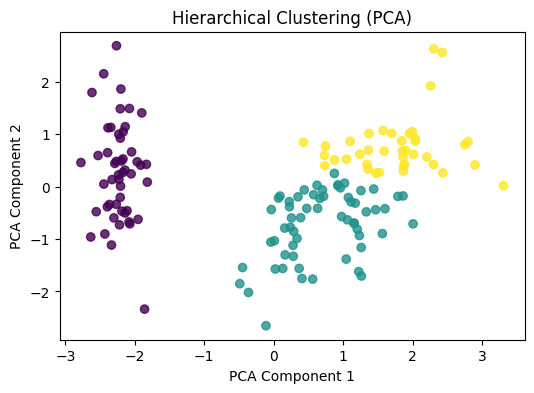

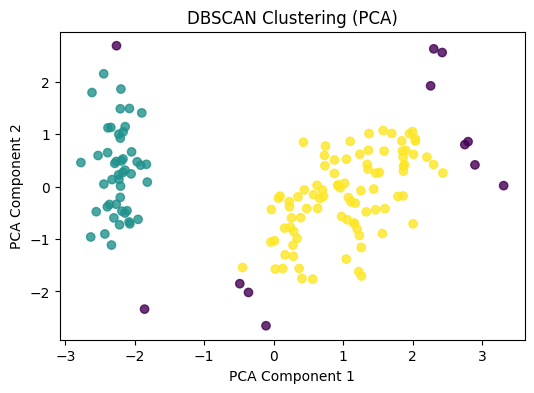

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# K-Means
# Ajustar o número de clusters (K) para 3, pois sabemos que há 3 espécies de Iris
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10) # n_init para garantir reprodutibilidade
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.8)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

print("\n")

# Agrupamento Hierárquico
# Ajustar o número de clusters para 3
hierarchical = AgglomerativeClustering(n_clusters=3)
y_hierarchical = hierarchical.fit_predict(X_pca)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hierarchical, cmap='viridis', alpha=0.8)
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

print("\n")

# DBSCAN
# Experimente diferentes valores para eps e min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5) # Estes são valores de exemplo, podem precisar de ajuste
y_dbscan = dbscan.fit_predict(X_pca)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis', alpha=0.8)
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()